In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt

from popularity import PopularityRecommender
from content import ContentFiltering
from main import rec_dict, rec_args, debug_opt
from debug import Debug

In [2]:
# Restart kernel before rerunning this

# Set up debug options (see debug_opt in main.py)
debug_opt['MEASUREMENTS'] = False # debug measurement of equilibrium
debug_opt['USER_PREFERENCES'] = True  # debug user preferences
debug_opt['RECOMMENDER'] = True # debug 
# Configure and initialize debugger
debugger = Debug(list(debug_opt.keys()), list(debug_opt.values()))

USER_PREFERENCES - Debugging module inizialized
RECOMMENDER - Debugging module inizialized


### Set up recommender system
This cell contains everything needed for setup.
### A few details on the available debugging options
- `'MEASUREMENTS'` is used to debug the `measurements` module. Right now, it only supports 
- `USER_PREFERENCES`

In [3]:
# Set up the following
RECSYS_TYPE = 'content' # choose from supported (see rec_dict in main.py)
NUM_USERS = 5
NUM_ITEMS_PER_ITER = 2  # num items presented to each user at each iteration
STARTUP_TIMESTEPS = 2  # num iterations of 'exploration'
RUN_TIMESTEPS = 6  # total num iterations
NUM_ITEMS = 10#round((STARTUP_TIMESTEPS + RUN_TIMESTEPS) * NUM_ITEMS_PER_ITER * np.random.uniform(1, 5))  # total num items in simulation

# Set up additional arguments (see rec_args[RECSYS_TYPE] in main.py for supported arguments)
# A: number of attributes; items_representation: attributes of each item
rec_args['content']['A'] = 5
rec_args['content']['items_representation'] = np.zeros((NUM_ITEMS, rec_args['content']['A']))

# For content filtering, generate array of attributes
for i, row in enumerate(rec_args['content']['items_representation']):
    A = rec_args['content']['A']
    n_indices = np.random.randint(1, A)
    indices = np.random.randint(A, size=(n_indices))
    row[indices] = 1
    rec_args['content']['items_representation'][i,:] = row
# Add it to args
rec_args['content']['items_representation'] = rec_args['content']['items_representation'].T

# Check RECSYS_TYPE
if RECSYS_TYPE not in rec_dict:
    raise ValueError("Recommender system type not supported. Supported types: " + ', '.join(rec_dict))

### Instantiate and run

USER_PREFERENCES - Plot: Histogram of users liking each item the most


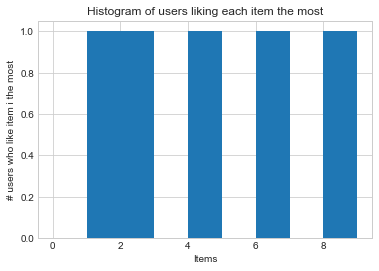

RECOMMENDER - Recommender system ready
RECOMMENDER - Num items: 10
RECOMMENDER - Users: 5
RECOMMENDER - Items per iter: 2
RECOMMENDER - Actual scores given by users (rows) to items (columns), unknown to system:
[[2.64 15.21 8.98 6.20 4.36 7.86 2.89 4.53 3.05 2.85]
 [2.45 2.96 6.21 1.31 0.02 5.48 7.35 2.84 4.11 9.34]
 [0.04 2.03 10.26 1.60 5.24 0.75 9.90 2.22 2.81 0.77]
 [2.22 0.32 5.99 7.65 11.73 3.45 3.12 10.36 5.94 4.82]
 [0.68 2.70 5.81 2.42 1.24 2.68 8.45 2.73 4.41 3.30]]
RECOMMENDER - Type of recommendation system: content
RECOMMENDER - Num attributes: 5
RECOMMENDER - Attributes of each item (rows):
[[0.00 1.00 0.00 1.00 0.00]
 [0.00 1.00 0.00 1.00 0.00]
 [1.00 1.00 0.00 1.00 0.00]
 [0.00 0.00 0.00 1.00 0.00]
 [0.00 0.00 1.00 1.00 1.00]
 [0.00 1.00 0.00 1.00 1.00]
 [0.00 0.00 1.00 1.00 0.00]
 [0.00 1.00 1.00 0.00 1.00]
 [0.00 0.00 1.00 1.00 0.00]
 [0.00 0.00 0.00 1.00 0.00]]
RECOMMENDER - User profiles known to the system represented by their attributes:
[[0 0 0 0 0]
 [0 0 0 0 0]


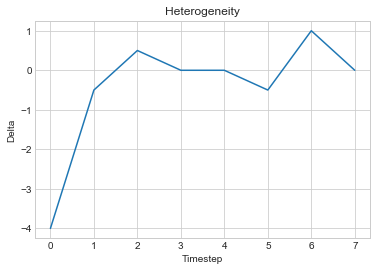

In [4]:
# Create recsys instance
if rec_args[RECSYS_TYPE] is None:
    rec = rec_dict[RECSYS_TYPE](NUM_USERS, NUM_ITEMS,
        num_items_per_iter=NUM_ITEMS_PER_ITER, randomize_recommended=True, user_preferences=True,
        debugger=debugger)
else:
    rec = rec_dict[RECSYS_TYPE](NUM_USERS, NUM_ITEMS,
        num_items_per_iter=NUM_ITEMS_PER_ITER, randomize_recommended=True, user_preferences=True, 
        debugger=debugger, **rec_args[RECSYS_TYPE])

# Startup
rec.startup_and_train(timesteps=STARTUP_TIMESTEPS, measurement_visualization_rule=False)

# Runtime
rec.run(timesteps=RUN_TIMESTEPS, train_between_steps=True, measurement_visualization_rule="%50 == 0")

delta_t = rec.get_heterogeneity()